### Computational Physics, Fall 2019 HW2

Michael Albergo

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Problem 1: 

Implementation for relaxation with parameter $w$. ($w > 0$ means over relaxation)

In [2]:
def relax(f, fprime, x_0, err_thres=1e-5, w=1):
    print("Relaxation factor:", w)
    print("Accepted errror threshold:", err_thres)
    # initial update to x
    #print(f(x_0) - )
    x_new = ((1+w)*f(x_0)) - w*x_0  # equation on page 260
    #print("x_new",x_new)
    n_steps = 1
    denom_factor = (1/((1+w)*fprime(x_0) - w))
    err = np.abs((x_0 - x_new)/(1 - denom_factor))
    while err > err_thres:
        x_old = x_new
        x_new = ((1 +w)*f(x_old)) - w*x_old
        n_steps+=1
        denom_factor = (1/((1+w)*fprime(x_0) - w))
        err = np.abs((x_old - x_new)/(1 - denom_factor))
        print("err:", err, "N:", n_steps)
        
    
    print("Final N steps:", n_steps)
    print("Final x:", x_new, "\n")
    return x_new, n_steps
    

In [3]:
def problem_func(x):
    return np.float(1.0 - np.exp(-2.0*x))

def problem_func_prime(x):
    return 2*np.exp(-2*x)

relax(problem_func, problem_func_prime, 0.5, w=0.0, err_thres=1e-6)
relax(problem_func, problem_func_prime, 0.5, w=0.7, err_thres=1e-6)

Relaxation factor: 0.0
Accepted errror threshold: 1e-06
err: 0.2378617248446034 N: 2
err: 0.12351784876811644 N: 3
err: 0.056283848801939665 N: 4
err: 0.024037030159537114 N: 5
err: 0.009972998791690153 N: 6
err: 0.004087536233560606 N: 7
err: 0.0016668772882381918 N: 8
err: 0.0006783408640850504 N: 9
err: 0.00027582048588559047 N: 10
err: 0.00011211306641906659 N: 11
err: 4.556437688322428e-05 N: 12
err: 1.8516975254960245e-05 N: 13
err: 7.524968078977995e-06 N: 14
err: 3.0579840506128653e-06 N: 15
err: 1.2426937647300679e-06 N: 16
err: 5.050011319298188e-07 N: 17
Final N steps: 17
Final x: 0.7968120058623394 

Relaxation factor: 0.7
Accepted errror threshold: 1e-06
err: 0.08470958050270937 N: 2
err: 0.003852653286620527 N: 3
err: 2.7031238802208072e-05 N: 4
err: 2.480439205716356e-07 N: 5
Final N steps: 5
Final x: 0.7968121318564699 



(0.7968121318564699, 5)

#### Problem 2:

Solve the equation $5e^{-x} + x - 5 = 0$

In [4]:
#from math import log
def equation(x):
    return 5*np.exp(-x) + (x) -5 # = 0

def binary_search(f, low, high, err_thres = 1e-6 ):
    if np.sign(f(low)) == np.sign(f(high)):
        assert False, ("low and high must surround the solution.")
    mid = (high+low)/2
    error = np.abs(low - high) / 2
    while(error)>err_thres:
        error = np.abs(low - high) / 2
        print("xhat:", mid, "error:", error )
        if equation(mid)*equation(high)>0:
            low,high = low,mid
        else:
            low,high = mid,high
        mid = (high+low)/2.0
    print("Final Estimate of x:", mid, "Final error:", error )

    return mid


x = binary_search(equation, 4, 6)

xhat: 5.0 error: 1.0
xhat: 4.5 error: 0.5
xhat: 4.75 error: 0.25
xhat: 4.875 error: 0.125
xhat: 4.9375 error: 0.0625
xhat: 4.96875 error: 0.03125
xhat: 4.953125 error: 0.015625
xhat: 4.9609375 error: 0.0078125
xhat: 4.96484375 error: 0.00390625
xhat: 4.966796875 error: 0.001953125
xhat: 4.9658203125 error: 0.0009765625
xhat: 4.96533203125 error: 0.00048828125
xhat: 4.965087890625 error: 0.000244140625
xhat: 4.9652099609375 error: 0.0001220703125
xhat: 4.96514892578125 error: 6.103515625e-05
xhat: 4.965118408203125 error: 3.0517578125e-05
xhat: 4.9651031494140625 error: 1.52587890625e-05
xhat: 4.965110778808594 error: 7.62939453125e-06
xhat: 4.965114593505859 error: 3.814697265625e-06
xhat: 4.965112686157227 error: 1.9073486328125e-06
xhat: 4.965113639831543 error: 9.5367431640625e-07
Final Estimate of x: 4.965114116668701 Final error: 9.5367431640625e-07


In [5]:
h = 6.62606896e-34 # J s
c = 299792458 # m/s
k = 1.3806504e-23 # m2 kg s-2 K-1
a = h*c / k

##### b) Solving for b

$$ b = \frac{h c}{k_b x}$$

In [6]:
b = a / x

print("Estimate of Wein's displacement constant:", b)

Estimate of Wein's displacement constant: 0.0028977685635416047


##### c) Solving for T

$$ T = \frac{b}{\lambda} $$

where we take $\lambda = 502 x 10^{-9}$ meters for the Sun's wavelength peak emitted radiation.

In [7]:
T = b / (5.02 * 1e-7)

In [8]:
print("Estimate of Temperature of the Sun:", T, "Kelvin")

Estimate of Temperature of the Sun: 5772.447337732281 Kelvin


#### Problem 3:

Gradient descent land !

In [62]:
def central(func, x, h):
    derivative = (func(x + h/2) - func(x - h/2)) / h
    return derivative

def extrapolated(func, x, h):
    derivative = ((8*func(x + h) - 8*func(x-h) + 
                   func(x - 2.0*h) - func(x + 2.0*h)) / (12.0*h))
    return derivative

In [63]:
def gradient(f, parameters, h):
    derivs = np.ones((len(parameters),))
    for i in range(len(parameters)):
        def partialize_f_wrt(x):
            for j in range(len(parameters)):
                func_inp = [parameters[p] if p != i else x for p in range(len(parameters))]
            return f(func_inp)
        
        ## calculate derivative
        deriv_wrt_i =  extrapolated(func = partialize_f_wrt, x = parameters[i], h = h)
        derivs[i] = deriv_wrt_i
        
    return derivs

##### Testing on suggested function

$$ f(x,y) = (x-2)^2 + (y-2)^2 $$

In [64]:
def function_test(xs): 
    return (xs[0]-2)**2 + (xs[1]-2)**2

In [65]:
gradient(function_test, parameters = [10.0,4.0], h = 0.01)

array([16.,  4.])

In [66]:
def grad_descent(f, lr=0.1, initialization = [], deriv_step=1e-3, err_thres=1e-6, epochs=200):
    if(len(initialization) == 0):
        print("Error, params not initialized.")
        return -1
    parameters = np.array(initialization, dtype=np.double)
    grad = gradient(f, parameters, h = deriv_step)
    epoch = 0
    grad_norms = []
    epoch_list = []
    params_over_time = []

    #initial error and parameters
    grad_norm = np.sqrt(grad@grad)
    grad_norms.append(grad_norm)
    params_over_time.append(initialization)
    epoch_list.append(epoch)
    
    while grad_norm > err_thres:
        parameters -= grad * lr 
        grad = gradient(f, parameters, deriv_step)
        params_over_time.append(parameters.copy())
        grad_norm = np.sqrt(grad@grad)
        grad_norms.append(grad_norm)
        epoch_list.append(epoch)
        epoch += 1
        
        if epoch >= epochs:
            break
    return np.array(grad_norms), np.array(params_over_time), np.array(epoch_list) # final parameters, grad_norms

In [67]:
# Run the gradient descent

grad_norms, params_over_time, epochs = grad_descent(function_test, lr = 0.05, 
                                                initialization = [10,-20], epochs=1000)

print(grad_norms.shape, params_over_time[:,0].shape, epochs.shape)

(169,) (169,) (169,)


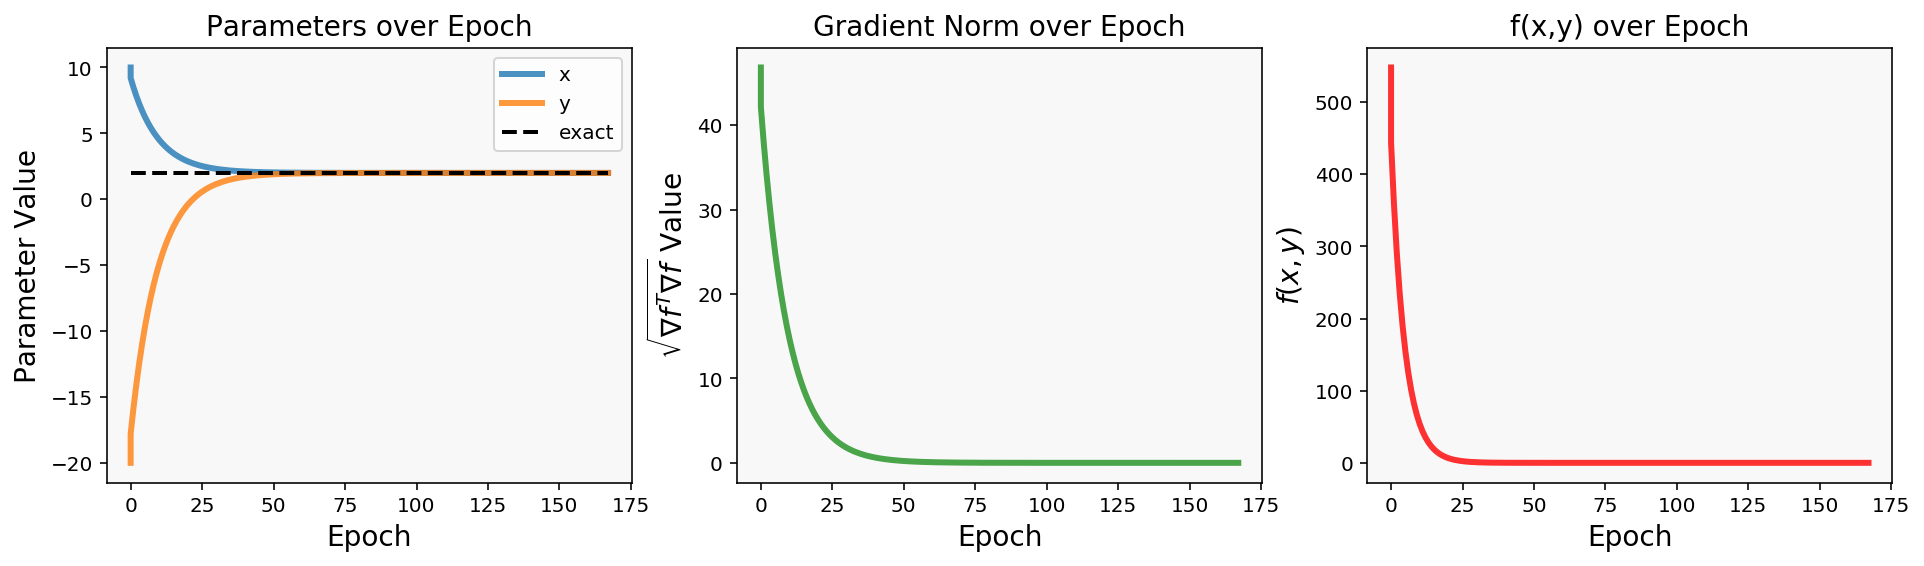

In [68]:
fig, axes = plt.subplots(1,3, figsize=(16,4))

axes[0].plot(epochs, params_over_time[:,0], label = 'x', linewidth = 3, alpha = 0.8)
axes[0].plot(epochs, params_over_time[:,1], label = 'y', linewidth = 3, alpha = 0.8)
axes[0].plot(epochs, 2*np.ones(len(epochs)), c = 'black', linestyle = '--', label = 'exact', linewidth = 2)
axes[0].set_title("Parameters over Epoch", fontsize = 14)
axes[0].set_xlabel("Epoch", fontsize = 14)
axes[0].set_ylabel("Parameter Value", fontsize = 14)
axes[0].legend(loc='best')
axes[0].patch.set_facecolor('gray')
axes[0].patch.set_alpha(0.05)


axes[1].plot(epochs, grad_norms, c='green', linewidth = 3, alpha = 0.7)
axes[1].set_title("Gradient Norm over Epoch", fontsize = 14)
axes[1].set_xlabel("Epoch",  fontsize = 14)
axes[1].set_ylabel(r"$\sqrt{\nabla f^T \nabla f}$ Value", fontsize = 14)
axes[1].patch.set_facecolor('gray')
axes[1].patch.set_alpha(0.05)


function_evals = []
for i in range(len(epochs)):
    function_evals.append(function_test(params_over_time[i]))
axes[2].plot(epochs,function_evals, c='red', linewidth = 3, alpha = 0.8)
axes[2].set_title("f(x,y) over Epoch", fontsize = 14)
axes[2].set_xlabel("Epoch", fontsize = 14)
axes[2].set_ylabel(r"$f(x,y)$", fontsize = 14)
axes[2].patch.set_facecolor('gray')
axes[2].patch.set_alpha(0.05)



#plt.savefig("figs/gradient_test.pdf")


### Looks like the code works! Let's play with the schechter function.

In [69]:
data = np.loadtxt("smf_cosmos.dat")

print(data.shape)

## three free parameters

(12, 3)


In [70]:
#have to expoentiate the logged masses in the file

def schechter_function(M_gal, M, phi, alpha):
    exp_M = 10.0**M
    exp_phi = 10.0**phi
    ln10 = np.log(10)
    return exp_phi * ((M_gal / exp_M)**(alpha+1)) * np.exp(-M_gal / exp_M) * ln10

def chi2(parameters, f=schechter_function, data=data, log = True):
    chi2 = 0
    for i in range(data.shape[0]):
        f_input = 10**(data[i,0])
        chi2 += (f(f_input, *parameters) - data[i,1])**2 / (data[i,2])**2
        
    if log == True:
        return np.log(chi2)
    else:
        return chi2
    



In [71]:
grad_norms_schec, params_over_time_schec, epochs_schec = grad_descent(chi2, lr = 0.0038, 
                                                initialization = [10., -2.1, 0.5], epochs=900)
grad_norms_schec2, params_over_time_schec2, epochs_schec2 = grad_descent(chi2, lr = 0.0038, 
                                                initialization = [11.1, -3.1, 0.8], epochs=900)

grad_norms_schec3, params_over_time_schec3, epochs_schec3 = grad_descent(chi2, lr = 0.0038, 
                                                initialization = [12.5, 2.4, -1.5], epochs=900)

grad_norms_schec4, params_over_time_schec4, epochs_schec4 = grad_descent(chi2, lr = 0.0038, 
                                                initialization = [14.0, 5., -5.], epochs=900)
#print(grad_norms_schec[::20])

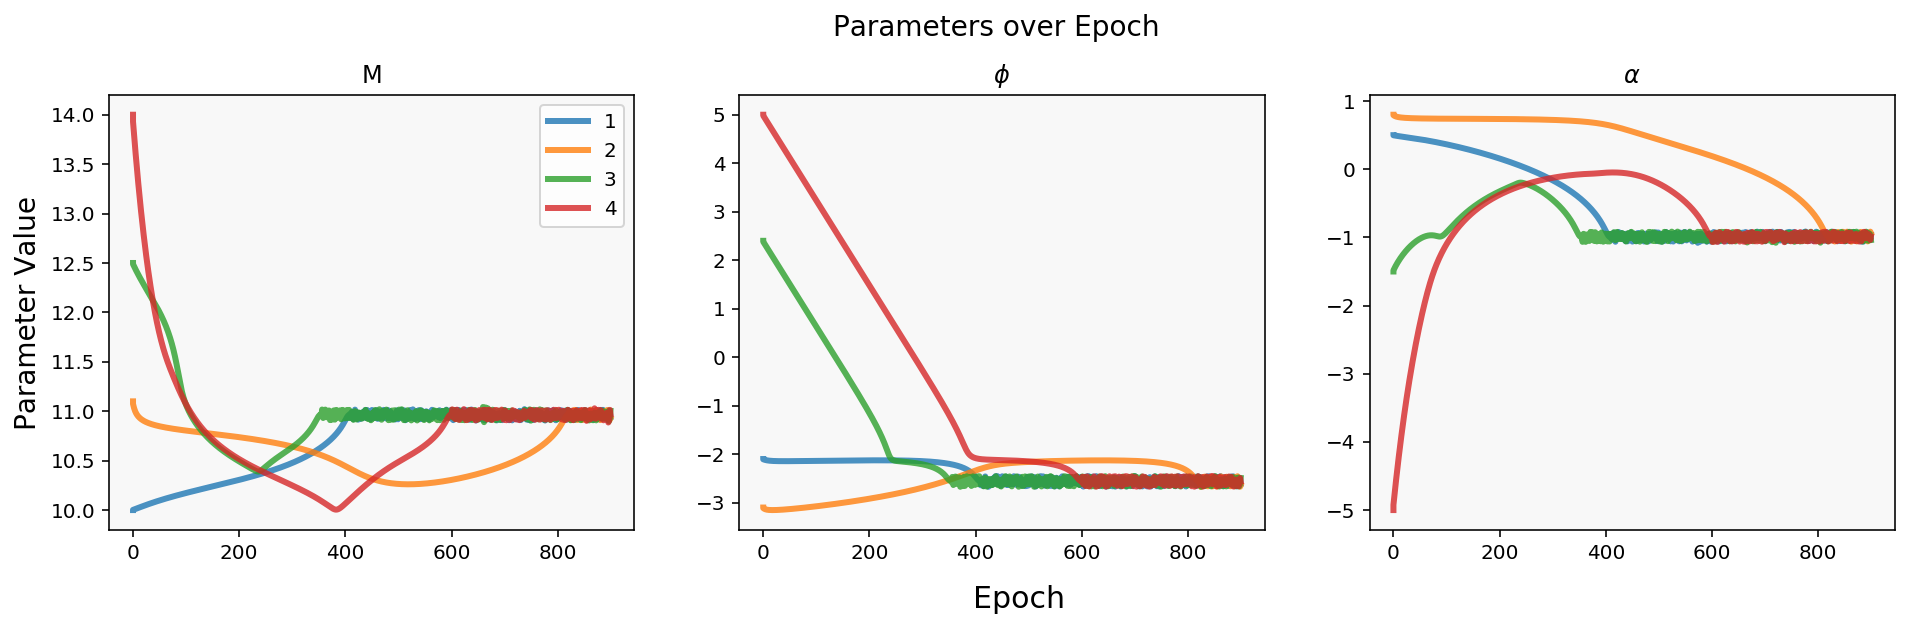

In [78]:
fig, axes = plt.subplots(1,3, figsize=(16,4))

axes[0].plot(epochs_schec, params_over_time_schec[:,0], label = '1', linewidth = 3, alpha = 0.8)
axes[0].plot(epochs_schec2, params_over_time_schec2[:,0], label = '2', linewidth = 3, alpha = 0.8)
axes[0].plot(epochs_schec3, params_over_time_schec3[:,0], label = '3', linewidth = 3, alpha = 0.8)
axes[0].plot(epochs_schec4, params_over_time_schec4[:,0], label = '4', linewidth = 3, alpha = 0.8)
axes[0].set_title(r"M")

axes[1].plot(epochs_schec, params_over_time_schec[:,1], label = '1', linewidth = 3, alpha = 0.8)
axes[1].plot(epochs_schec2, params_over_time_schec2[:,1], label = '2', linewidth = 3, alpha = 0.8)
axes[1].plot(epochs_schec3, params_over_time_schec3[:,1], label = '3', linewidth = 3, alpha = 0.8)
axes[1].plot(epochs_schec4, params_over_time_schec4[:,1], label = '4', linewidth = 3, alpha = 0.8)
axes[1].set_title(r"$\phi$")

axes[2].plot(epochs_schec, params_over_time_schec[:,2], label = '1', linewidth = 3, alpha = 0.8)
axes[2].plot(epochs_schec2, params_over_time_schec2[:,2], label = '2', linewidth = 3, alpha = 0.8)
axes[2].plot(epochs_schec3, params_over_time_schec3[:,2], label = '3', linewidth = 3, alpha = 0.8)
axes[2].plot(epochs_schec4, params_over_time_schec4[:,2], label = '4', linewidth = 3, alpha = 0.8)
axes[2].set_title(r"$\alpha$")

plt.suptitle("Parameters over Epoch", x = 0.51, y = 1.02, fontsize = 14)
fig.text(0.5, -0.01, "Epoch", fontsize = 15)
axes[0].set_ylabel("Parameter Value", fontsize = 14)
axes[0].legend(loc='best')
axes[0].patch.set_facecolor('gray')
axes[1].patch.set_facecolor('gray')
axes[2].patch.set_facecolor('gray')
axes[0].patch.set_alpha(0.05)
axes[1].patch.set_alpha(0.05)
axes[2].patch.set_alpha(0.05)
#plt.savefig("figs/param_convergenceMgal_2.pdf", bbox_inches="tight")


# fig, axes2 = plt.subplots(1,1, figsize=(5,4))
# axes2.plot(epochs_schec[::10], grad_norms_schec[::10], linewidth = 1, alpha = 0.8)
# axes2.plot(epochs_schec2[::10], grad_norms_schec2[::10], linewidth = 1, alpha = 0.8)
# axes2.plot(epochs_schec3[::10], grad_norms_schec3[::10], linewidth = 1, alpha = 0.8)
# axes2.plot(epochs_schec4[::10], grad_norms_schec4[::10], linewidth = 1, alpha = 0.8)
# axes2.set_ylim(-50,50)
# axes2.set_ylabel(r"$\sqrt{\nabla f^T \nabla f}$ Value", fontsize = 14)
# axes2.set_xlabel("Epoch", fontsize = 14)
# axes2.patch.set_facecolor('gray')
# axes2.patch.set_alpha(0.05)
#plt.savefig("figs/gradnormMgal_2.pdf", bbox_inches="tight")

In [57]:
params_over_time_schec[10]

array([10.02012336, -2.13015486,  0.48685845])

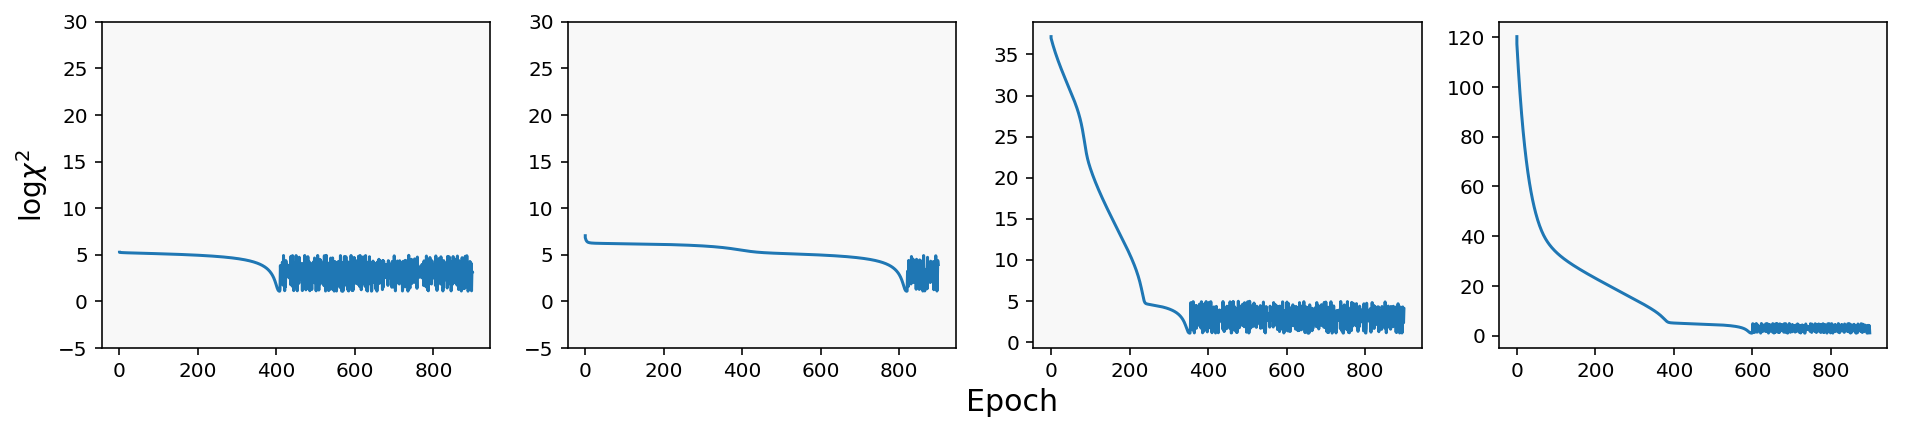

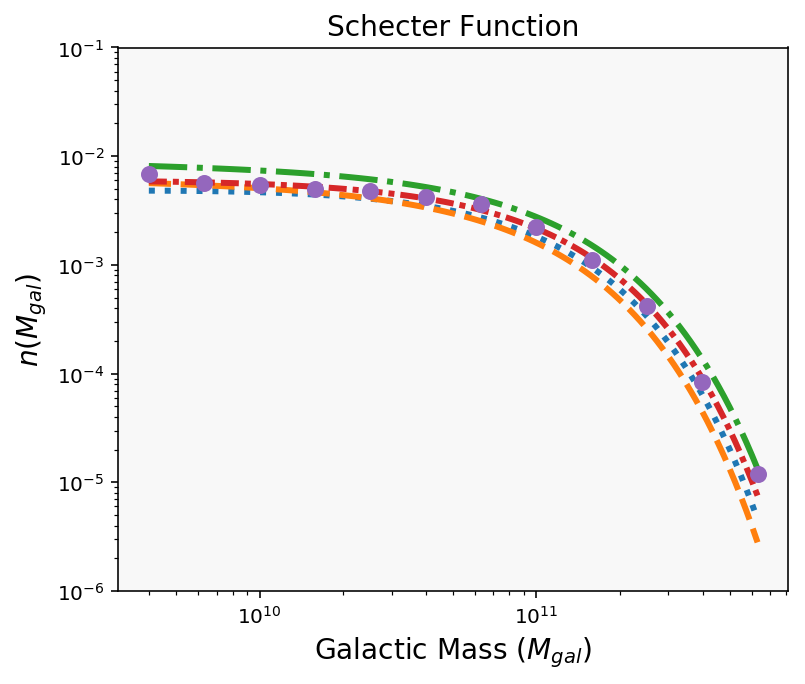

In [77]:

chi2_1 = [ chi2(params_over_time_schec[i], log=True) for i in range(params_over_time_schec.shape[0]) ]
chi2_2 = [ chi2(params_over_time_schec2[i], log=True) for i in range(params_over_time_schec2.shape[0]) ]
chi2_3 = [ chi2(params_over_time_schec3[i], log=True) for i in range(params_over_time_schec3.shape[0]) ]
chi2_4 = [ chi2(params_over_time_schec4[i], log=True) for i in range(params_over_time_schec4.shape[0]) ]



fig, chi_axes = plt.subplots(1,4, figsize=(16,3))



chi_axes[0].plot(epochs_schec, chi2_1)
chi_axes[1].plot(epochs_schec2, chi2_2)
chi_axes[2].plot(epochs_schec3, chi2_3)
chi_axes[3].plot(epochs_schec4, chi2_4)
chi_axes[0].set_ylabel(r"$\log\chi^2$", fontsize = 14)
fig.text(0.5, -0.02, "Epoch", fontsize = 15)
chi_axes[0].patch.set_facecolor('gray')
chi_axes[0].patch.set_alpha(0.05)
chi_axes[1].patch.set_facecolor('gray')
chi_axes[1].patch.set_alpha(0.05)
chi_axes[2].patch.set_facecolor('gray')
chi_axes[2].patch.set_alpha(0.05)
chi_axes[3].patch.set_facecolor('gray')
chi_axes[3].patch.set_alpha(0.05)

# chi_axes[0].set_xscale("log")
# chi_axes[0].set_yscale("log")
# chi_axes[1].set_xscale("log")
# chi_axes[1].set_yscale("log")
# chi_axes[2].set_xscale("log")
# chi_axes[2].set_yscale("log")
# chi_axes[3].set_xscale("log")
# chi_axes[3].set_yscale("log")
chi_axes[0].set_ylim(-5, 30)
chi_axes[1].set_ylim(-5, 30)
plt.savefig("figs/chi2_2.pdf", bbox_inches="tight")
plt.show()



mvals = np.geomspace(10**(min(data[:, 0])), np.power(10, max(data[:, 0])), 110)


final_m1 = params_over_time_schec[-1][0]
final_phi1 = params_over_time_schec[-1][1]
final_alpha1 = params_over_time_schec[-1][2]

final_m2 = params_over_time_schec2[-1][0]
final_phi2 = params_over_time_schec2[-1][1]
final_alpha2 = params_over_time_schec2[-1][2]

final_m3 = params_over_time_schec3[-1][0]
final_phi3 = params_over_time_schec3[-1][1]
final_alpha3 = params_over_time_schec3[-1][2]

final_m4 = params_over_time_schec4[-1][0]
final_phi4 = params_over_time_schec4[-1][1]
final_alpha4 = params_over_time_schec4[-1][2]

ans1 = [schechter_function(m, final_m1, final_phi1, final_alpha1)
       for m in mvals]
ans2 = [schechter_function(m, final_m2, final_phi2, final_alpha3)
       for m in mvals]
ans3 = [schechter_function(m, final_m3, final_phi3, final_alpha3)
       for m in mvals]
ans4 = [schechter_function(m, final_m4, final_phi4, final_alpha4)
       for m in mvals]
fig, ax = plt.subplots(1,1, figsize=(6,5))
ax.plot(mvals, ans1, linewidth = 3, linestyle = 'dotted')
ax.plot(mvals, ans2, linewidth = 3, linestyle = 'dashed')
ax.plot(mvals, ans3, linewidth = 3, linestyle = 'dashdot')
ax.plot(mvals, ans4, linewidth = 3, linestyle = (0, (3, 1, 1, 1)))
ax.plot(10**data[:, 0], data[:, 1], '.', label="data", markersize=15)
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_xlabel(r"Galactic Mass $(M_{gal})$", fontsize = 14)
ax.set_ylabel("$n(M_{gal})$", fontsize = 14)
ax.set_title("Schecter Function", fontsize = 14)
ax.set_ylim(1e-6, 1e-1)
ax.patch.set_facecolor('gray')
ax.patch.set_alpha(0.05)
#plt.savefig("figs/schecter_function_2.pdf")